In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df1 = pd.read_csv("ConsumerElectronics.csv")

C:\Users\moham\AppData\Local\Temp\ipykernel_58372\3160692903.py:1: DtypeWarning: Columns (6,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("ConsumerElectronics.csv")


In [3]:
df2 = pd.read_excel("Media data and other information.xlsx")

In [4]:
df3 = pd.read_excel("ONTARIO-2015.xlsx")

In [5]:
df4 = pd.read_excel("ONTARIO-2016.xlsx")

In [6]:
df5 = pd.read_excel("Product Details.xlsx")

In [7]:
df1['order_date'] = pd.to_datetime(df1['order_date']).dt.date

In [8]:
df1.rename(columns={'s1_fact.order_payment_type': 'payment_type'}, inplace=True)

In [9]:
df1['Day'] = pd.to_datetime(df1['order_date']).dt.day

In [10]:
df1 = df1[['order_date','Year', 'Month','Day','gmv', 'units', 'deliverybdays', 'deliverycdays','payment_type', 'sla',
       'product_analytic_category','product_analytic_sub_category', 'product_analytic_vertical','product_mrp', 'product_procurement_sla']]

In [11]:
df1

,order_date,Year,Month,Day,gmv,units,deliverybdays,deliverycdays,payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,2015-10-17,2015,10,17,6400,1,\N,\N,COD,5,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,2015-10-19,2015,10,19,6900,1,\N,\N,COD,7,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,2015-10-20,2015,10,20,1990,1,\N,\N,COD,10,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,2015-10-14,2015,10,14,1690,1,\N,\N,Prepaid,4,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,2015-10-17,2015,10,17,1618,1,\N,\N,Prepaid,6,CameraAccessory,CameraAccessory,CameraTripod,2099,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648819,2015-09-27,2015,9,27,2200,1,\N,\N,COD,7,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2
1648820,2015-09-28,2015,9,28,2098,1,\N,\N,COD,10,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2
1648821,2015-09-29,2015,9,29,2098,1,\N,\N,COD,5,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2
1648822,2015-09-29,2015,9,29,2200,1,\N,\N,COD,3,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2


In [12]:
df1['gmv'] = pd.to_numeric(df1['gmv'], errors='coerce') 

In [13]:
df1['deliverybdays'] = pd.to_numeric(df1['deliverybdays'], errors='coerce') 
df1['deliverybdays'] = df1['deliverybdays'].apply(lambda x: np.nan if x <= 0  else x)

mode_value = df1['deliverybdays'].mode()[0]
df1['deliverybdays'].fillna(mode_value, inplace=True)

In [14]:
df1['deliverycdays'] = pd.to_numeric(df1['deliverycdays'], errors='coerce') 
df1['deliverycdays'] = df1['deliverycdays'].apply(lambda x: np.nan if x <= 0  else x)

mode_value = df1['deliverycdays'].mode()[0]
df1['deliverycdays'].fillna(mode_value, inplace=True)

In [15]:
df1['product_procurement_sla'].value_counts()

product_procurement_sla
 2       528419
 1       308509
 3       303360
 5       222102
 4       120192
-1        75986
 0        42461
 6        18560
 7        11746
 15        6184
 14        5281
 1000      4745
 13         526
 8          523
 9           97
 10          73
 12          60
Name: count, dtype: int64

In [16]:
df1['product_procurement_sla'] = df1['product_procurement_sla'].apply(lambda x: np.nan if x < 1 else x)
mode_value = df1['product_procurement_sla'].mode()[0]
df1['product_procurement_sla'].fillna(mode_value, inplace=True)

In [17]:
df1.dropna(inplace = True)

In [18]:
df1

,order_date,Year,Month,Day,gmv,units,deliverybdays,deliverycdays,payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,2015-10-17,2015,10,17,6400.0,1,4.0,5.0,COD,5,CameraAccessory,CameraAccessory,CameraTripod,7190,2.0
1,2015-10-19,2015,10,19,6900.0,1,4.0,5.0,COD,7,CameraAccessory,CameraAccessory,CameraTripod,7190,2.0
2,2015-10-20,2015,10,20,1990.0,1,4.0,5.0,COD,10,CameraAccessory,CameraAccessory,CameraTripod,2099,3.0
3,2015-10-14,2015,10,14,1690.0,1,4.0,5.0,Prepaid,4,CameraAccessory,CameraAccessory,CameraTripod,2099,3.0
4,2015-10-17,2015,10,17,1618.0,1,4.0,5.0,Prepaid,6,CameraAccessory,CameraAccessory,CameraTripod,2099,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648819,2015-09-27,2015,9,27,2200.0,1,4.0,5.0,COD,7,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2.0
1648820,2015-09-28,2015,9,28,2098.0,1,4.0,5.0,COD,10,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2.0
1648821,2015-09-29,2015,9,29,2098.0,1,4.0,5.0,COD,5,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2.0
1648822,2015-09-29,2015,9,29,2200.0,1,4.0,5.0,COD,3,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2.0


In [19]:
df2.drop(df2.columns[0], axis=1, inplace = True)
df2a = df2[1:].reset_index(drop=True)
df2a.columns = ["Appliances","Frequency","Percent"]
df2a = df2a.reset_index(drop=True)
df2a

,Appliances,Frequency,Percent
0,\N,5828,0.353464
1,AmplifierReceiver,4056,0.245994
2,AudioMP3Player,112892,6.846819
3,Binoculars,14599,0.885419
4,BoomBox,2879,0.174609
...,...,...,...
70,TVOutCableAccessory,7618,0.462026
71,VideoGlasses,36723,2.227224
72,VideoPlayer,20295,1.230877
73,VoiceRecorder,3722,0.225737


In [20]:
df3a = df3[24:].reset_index(drop=True)
df3a.columns = df3.iloc[23]
df3a = df3a.reset_index(drop=True)

In [21]:
df3a['Date/Time'] = pd.to_datetime(df3a['Date/Time']).dt.date
df3a.rename(columns={'Date/Time': 'Date'}, inplace=True)

In [22]:
df4a = df4[24:].reset_index(drop=True)
df4a.columns = df4.iloc[23]

df4a = df4a.reset_index(drop=True)

In [23]:
df4a['Date/Time'] = pd.to_datetime(df4a['Date/Time']).dt.date
df4a.rename(columns={'Date/Time': 'Date'}, inplace=True)

In [24]:
df3a

23,Date,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,2015-01-01,2015,1,1,†,0,NaN,-8.5,NaN,-4.3,...,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2015-01-02,2015,1,2,†,3,NaN,-3,NaN,0,...,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2015-01-03,2015,1,3,†,2.5,NaN,-4,NaN,-0.8,...,0,NaN,24,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2015-01-04,2015,1,4,†,2.5,NaN,0,NaN,1.3,...,1,NaN,1,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2015-01-05,2015,1,5,†,-10,NaN,-13.5,NaN,-11.8,...,3,NaN,3,NaN,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2015-12-27,2015,12,27,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,2015-12-28,2015,12,28,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,2015-12-29,2015,12,29,†,6.5,NaN,-2,NaN,2.3,...,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
363,2015-12-30,2015,12,30,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df3a = df3a.dropna(subset=['Data Quality'])
df4a = df4a.dropna(subset=['Data Quality'])

In [26]:
df3a = df3a[['Date', 'Year', 'Month', 'Day', 'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)','Heat Deg Days (°C)',
             'Cool Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)']]

In [27]:
df4a = df4a[['Date', 'Year', 'Month', 'Day', 'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)','Heat Deg Days (°C)',
             'Cool Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)']]

In [28]:
df4a.isnull().sum()

23
Date                  0
Year                  0
Month                 0
Day                   0
Max Temp (°C)         1
Min Temp (°C)         8
Mean Temp (°C)        8
Heat Deg Days (°C)    8
Cool Deg Days (°C)    8
Total Rain (mm)       0
Total Snow (cm)       0
Total Precip (mm)     0
Snow on Grnd (cm)     0
dtype: int64

In [29]:
df3a.fillna(method='ffill', inplace=True)

In [30]:
df4a.fillna(method='ffill', inplace=True)

In [31]:
df1

,order_date,Year,Month,Day,gmv,units,deliverybdays,deliverycdays,payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,2015-10-17,2015,10,17,6400.0,1,4.0,5.0,COD,5,CameraAccessory,CameraAccessory,CameraTripod,7190,2.0
1,2015-10-19,2015,10,19,6900.0,1,4.0,5.0,COD,7,CameraAccessory,CameraAccessory,CameraTripod,7190,2.0
2,2015-10-20,2015,10,20,1990.0,1,4.0,5.0,COD,10,CameraAccessory,CameraAccessory,CameraTripod,2099,3.0
3,2015-10-14,2015,10,14,1690.0,1,4.0,5.0,Prepaid,4,CameraAccessory,CameraAccessory,CameraTripod,2099,3.0
4,2015-10-17,2015,10,17,1618.0,1,4.0,5.0,Prepaid,6,CameraAccessory,CameraAccessory,CameraTripod,2099,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648819,2015-09-27,2015,9,27,2200.0,1,4.0,5.0,COD,7,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2.0
1648820,2015-09-28,2015,9,28,2098.0,1,4.0,5.0,COD,10,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2.0
1648821,2015-09-29,2015,9,29,2098.0,1,4.0,5.0,COD,5,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2.0
1648822,2015-09-29,2015,9,29,2200.0,1,4.0,5.0,COD,3,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2.0


In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1643920 entries, 0 to 1648823
Data columns (total 15 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   order_date                     1643920 non-null  object 
 1   Year                           1643920 non-null  int64  
 2   Month                          1643920 non-null  int64  
 3   Day                            1643920 non-null  int32  
 4   gmv                            1643920 non-null  float64
 5   units                          1643920 non-null  int64  
 6   deliverybdays                  1643920 non-null  float64
 7   deliverycdays                  1643920 non-null  float64
 8   payment_type                   1643920 non-null  object 
 9   sla                            1643920 non-null  int64  
 10  product_analytic_category      1643920 non-null  object 
 11  product_analytic_sub_category  1643920 non-null  object 
 12  product_analytic_ve

In [33]:
df_weather = pd.concat([df3a,df4a])

In [34]:
df_weather = df_weather.reset_index(drop=True)

In [35]:
df_weather

23,Date,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,2015-01-01,2015,1,1,0.0,-8.5,-4.3,22.3,0.0,0.0,0.0,0.0,0
1,2015-01-02,2015,1,2,3.0,-3.0,0.0,18.0,0.0,0.0,0.0,0.0,0
2,2015-01-03,2015,1,3,2.5,-4.0,-0.8,18.8,0.0,24.0,0.0,24.0,0
3,2015-01-04,2015,1,4,2.5,0.0,1.3,16.7,0.0,0.0,1.0,1.0,0
4,2015-01-05,2015,1,5,-10.0,-13.5,-11.8,29.8,0.0,0.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,2016-12-26,2016,12,26,13.0,0.5,6.8,11.2,0.0,14.4,0.0,14.4,3
452,2016-12-27,2016,12,27,0.5,-2.0,-0.8,18.8,0.0,0.0,0.0,0.0,0
453,2016-12-29,2016,12,29,6.0,-1.5,2.3,15.7,0.0,0.0,0.0,0.0,0
454,2016-12-30,2016,12,30,2.5,-2.5,0.0,18.0,0.0,0.0,0.0,0.0,0


In [36]:
df1['order_date'] = pd.to_datetime(df1['order_date'])
df_weather['Date'] = pd.to_datetime(df_weather['Date'])

In [37]:
df = pd.merge(df1, df_weather, left_on='order_date', right_on='Date', how='left')

In [38]:
df

,order_date,Year_x,Month_x,Day_x,gmv,units,deliverybdays,deliverycdays,payment_type,sla,...,Day_y,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,2015-10-17,2015,10,17,6400.0,1,4.0,5.0,COD,5,...,17.0,9.0,4.5,9.8,8.2,0.0,0.0,0.0,0.0,0.0
1,2015-10-19,2015,10,19,6900.0,1,4.0,5.0,COD,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-10-20,2015,10,20,1990.0,1,4.0,5.0,COD,10,...,20.0,22.0,12.5,17.3,0.7,0.0,0.0,0.0,0.0,0.0
3,2015-10-14,2015,10,14,1690.0,1,4.0,5.0,Prepaid,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-10-17,2015,10,17,1618.0,1,4.0,5.0,Prepaid,6,...,17.0,9.0,4.5,9.8,8.2,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643915,2015-09-27,2015,9,27,2200.0,1,4.0,5.0,COD,7,...,27.0,25.5,14.5,20.0,0.0,2.0,0.0,0.0,0.0,0.0
1643916,2015-09-28,2015,9,28,2098.0,1,4.0,5.0,COD,10,...,28.0,26.5,19.0,22.8,0.0,4.8,0.0,0.0,0.0,0.0
1643917,2015-09-29,2015,9,29,2098.0,1,4.0,5.0,COD,5,...,29.0,22.5,17.0,19.8,0.0,1.8,9.8,0.0,9.8,0.0
1643918,2015-09-29,2015,9,29,2200.0,1,4.0,5.0,COD,3,...,29.0,22.5,17.0,19.8,0.0,1.8,9.8,0.0,9.8,0.0


In [39]:
df["Snow on Grnd (cm)"] = df["Snow on Grnd (cm)"]*10
df["Total Snow (cm)"] = df["Total Snow (cm)"]*10

df.rename(columns={"Year_x": "Year", "Month_x": "Month", "Day_x": "Day",
                   "Total Snow (cm)": "Total Snow (mm)", "Snow on Grnd (cm)": "Snow on Grnd (mm)"}, inplace=True)
df.drop(columns = ["Year_y", "Month_y", 'Day_y',"Date"], inplace = True)

In [40]:
for i in ["Max Temp (°C)","Min Temp (°C)","Mean Temp (°C)","Heat Deg Days (°C)","Cool Deg Days (°C)","Total Rain (mm)","Total Snow (mm)","Total Precip (mm)","Snow on Grnd (mm)"]:
    average_temps = df.groupby(['Year', 'Month'])[i].transform('mean')

    df[i] = df[i].fillna(average_temps)
    df[i] = df[i].astype(int)

In [41]:
import holidays
canada_holidays = holidays.Canada(prov='ON')
df['Holiday_Flag'] = df['order_date'].apply(lambda x: 1 if x in canada_holidays else 0)
df['Pay_Date_Flag'] = df['order_date'].apply(lambda x: 1 if x.day in [1, 15] else 0)

In [42]:
df = df.sort_values(by='order_date')
df = df.reset_index(drop=True)

In [43]:
df

,order_date,Year,Month,Day,gmv,units,deliverybdays,deliverycdays,payment_type,sla,...,Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (mm),Total Precip (mm),Snow on Grnd (mm),Holiday_Flag,Pay_Date_Flag
0,2015-05-19,2015,5,19,3149.0,1,4.0,5.0,COD,6,...,11,12,5,0,0,0,0,0,0,0
1,2015-06-11,2015,6,11,275.0,1,4.0,5.0,COD,8,...,16,19,0,1,1,0,1,0,0,0
2,2015-06-24,2015,6,24,188.0,1,4.0,5.0,COD,8,...,12,19,0,1,0,0,0,0,0,0
3,2015-06-25,2015,6,25,250.0,1,4.0,5.0,COD,7,...,14,19,0,1,16,0,16,0,0,0
4,2015-06-26,2015,6,26,350.0,1,4.0,5.0,COD,5,...,14,19,0,1,27,0,27,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643915,2016-07-22,2016,7,22,21495.0,1,4.0,5.0,COD,8,...,22,28,0,10,0,0,0,0,0,0
1643916,2016-07-24,2016,7,24,439.0,1,1.0,2.0,COD,0,...,22,26,0,8,10,0,10,0,0,0
1643917,2016-07-24,2016,7,24,299.0,1,7.0,8.0,COD,8,...,22,26,0,8,10,0,10,0,0,0
1643918,2016-07-25,2016,7,25,2199.0,1,4.0,5.0,COD,6,...,23,28,0,10,0,0,0,0,0,0


# EDA

In [44]:
df.columns

Index(['order_date', 'Year', 'Month', 'Day', 'gmv', 'units', 'deliverybdays',
       'deliverycdays', 'payment_type', 'sla', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'product_mrp', 'product_procurement_sla', 'Max Temp (°C)',
       'Min Temp (°C)', 'Mean Temp (°C)', 'Heat Deg Days (°C)',
       'Cool Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (mm)',
       'Total Precip (mm)', 'Snow on Grnd (mm)', 'Holiday_Flag',
       'Pay_Date_Flag'],
      dtype='object')

# Categorical

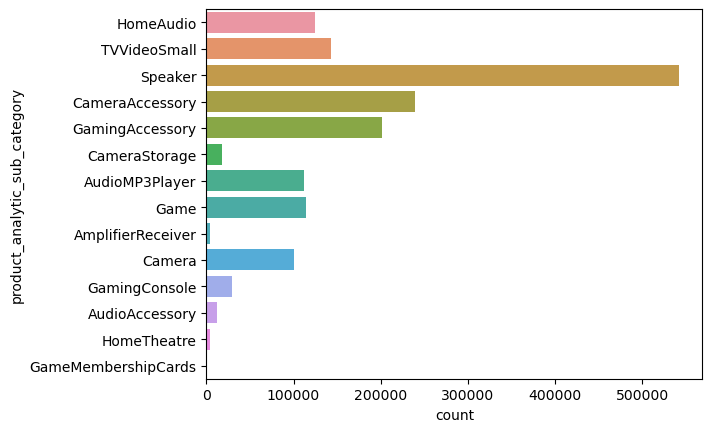

In [45]:
sns.countplot(data=df, y='product_analytic_sub_category')
plt.show()

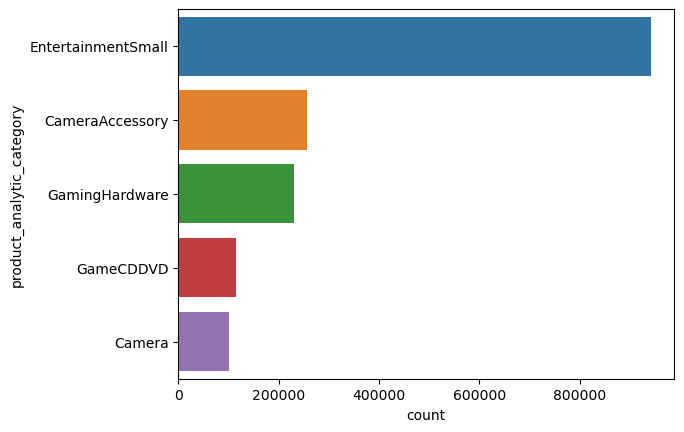

In [46]:
sns.countplot(data=df, y='product_analytic_category')
plt.show()

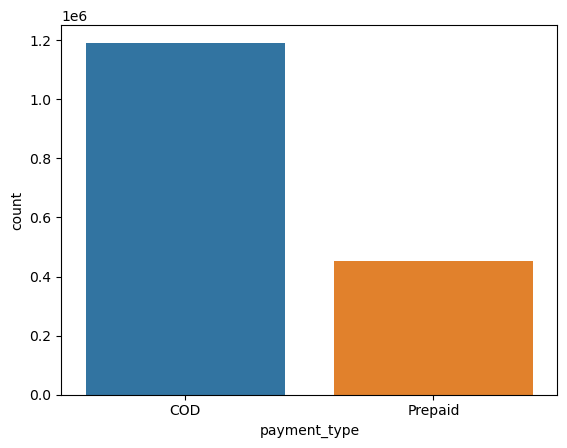

In [47]:
sns.countplot(data=df, x='payment_type')
plt.show()

In [48]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
order_date,1643920,2016-01-09 22:33:09.784416768,2015-05-19 00:00:00,2015-10-16 00:00:00,2016-01-07 00:00:00,2016-04-01 00:00:00,2016-07-25 00:00:00,NaN
Year,1643920.0,2015.520102,2015.0,2015.0,2016.0,2016.0,2016.0,0.499596
Month,1643920.0,6.577604,1.0,3.0,6.0,10.0,12.0,3.625115
Day,1643920.0,15.852925,1.0,9.0,16.0,23.0,31.0,8.583045
gmv,1643920.0,2461.124102,0.0,340.0,750.0,1999.0,226947.0,5618.842236
units,1643920.0,1.022072,1.0,1.0,1.0,1.0,50.0,0.253275
deliverybdays,1643920.0,4.124723,1.0,4.0,4.0,4.0,238.0,1.505511
deliverycdays,1643920.0,5.0705,1.0,5.0,5.0,5.0,278.0,1.743349
sla,1643920.0,5.687778,0.0,4.0,6.0,7.0,1006.0,2.98387
product_mrp,1643920.0,4110.146236,0.0,799.0,1599.0,3499.0,299999.0,8514.986572


# Numerical

Skewness =  1.4340638965660384


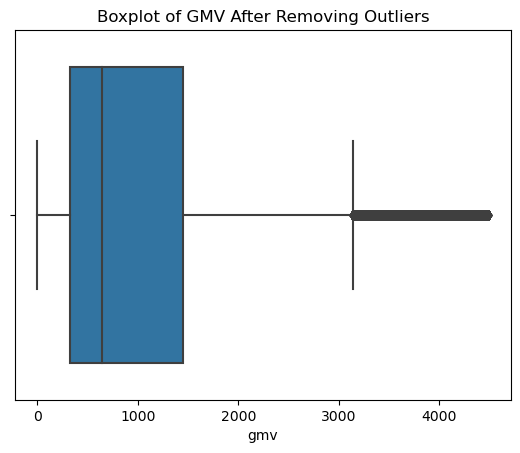

In [53]:
print("Skewness = ",df['gmv'].skew())
sns.boxplot(data=df, x='gmv')
plt.title('Boxplot of GMV After Removing Outliers')
plt.show()

In [54]:
df['weather_affect'] = np.where((df['Total Rain (mm)'] > 20) | (df['Total Snow (mm)'] > 5 ) |( df['Snow on Grnd (mm)']>5), 1, 0)

C:\Users\moham\AppData\Local\Temp\ipykernel_58372\2546355275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weather_affect'] = np.where((df['Total Rain (mm)'] > 20) | (df['Total Snow (mm)'] > 5 ) |( df['Snow on Grnd (mm)']>5), 1, 0)


In [55]:
df['is_delayed'] = np.where(df['deliverycdays'] > df['sla'], 1, 0)

C:\Users\moham\AppData\Local\Temp\ipykernel_58372\1451161801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_delayed'] = np.where(df['deliverycdays'] > df['sla'], 1, 0)


In [56]:
def get_season(date):
    if (date.month == 12 and date.day >= 21) or (date.month <= 3 and date.day <= 19):
        return 1 # winter
    elif (date.month == 3 and date.day >= 20) or (date.month <= 6 and date.day <= 20):
        return 2 # spring
    elif (date.month == 6 and date.day >= 21) or (date.month <= 9 and date.day <= 21):
        return 3 #summer
    else:
        return 4 #autumn

df['climate'] = df['order_date'].apply(get_season)

C:\Users\moham\AppData\Local\Temp\ipykernel_58372\228454568.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['climate'] = df['order_date'].apply(get_season)


In [57]:
print(df['climate'].value_counts())

climate
4    648203
1    307183
2    294881
3    232039
Name: count, dtype: int64


In [58]:
df['is_colder'] = df['Mean Temp (°C)'].apply(lambda x: 1 if x < 10 else 0)

C:\Users\moham\AppData\Local\Temp\ipykernel_58372\1663630107.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_colder'] = df['Mean Temp (°C)'].apply(lambda x: 1 if x < 10 else 0)


In [59]:
print(df['is_colder'].value_counts())

is_colder
1    777397
0    704909
Name: count, dtype: int64


C:\Users\moham\AppData\Local\Temp\ipykernel_58372\3572766652.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='weather_affect', y='is_delayed', data=df, ci=None)


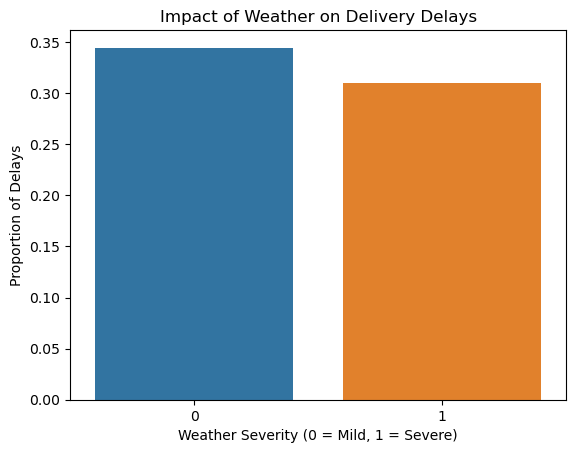

In [66]:
sns.barplot(x='weather_affect', y='is_delayed', data=df, ci=None)

plt.title('Impact of Weather on Delivery Delays')
plt.xlabel('Weather Severity (0 = Mild, 1 = Severe)')
plt.ylabel('Proportion of Delays')
plt.show()


In [60]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['weather_affect'], df['is_delayed'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi2 Statistic: {chi2}, p-value: {p}')

if p < 0.05:
    print("There is a significant relationship between weather severity and delivery delays.")
else:
    print("There is no significant relationship between weather severity and delivery delays.")


Chi2 Statistic: 1327.8654755529246, p-value: 9.947460010474979e-291
There is a significant relationship between weather severity and delivery delays.


In [61]:
contingency_table = pd.crosstab(df['climate'], df['is_delayed'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi2 Statistic: {chi2}, p-value: {p}')

if p < 0.05:
    print("There is a significant relationship between climate and delivery delays.")
else:
    print("There is no significant relationship between climate  and delivery delays.")

Chi2 Statistic: 1128.6271324534957, p-value: 2.2404317477372082e-244
There is a significant relationship between climate and delivery delays.


In [62]:
contingency_table = pd.crosstab(df['is_colder'], df['is_delayed'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi2 Statistic: {chi2}, p-value: {p}')

if p < 0.05:
    print("There is a significant relationship between Colder climate and delivery delays.")
else:
    print("There is no significant relationship between Colder climate  and delivery delays.")

Chi2 Statistic: 191.00277731800125, p-value: 1.920655044469e-43
There is a significant relationship between Colder climate and delivery delays.


In [63]:
from scipy import stats

category_groups = [group['gmv'] for name, group in df.groupby('climate')]

# Perform One-Way ANOVA
f_stat, p_value = stats.f_oneway(*category_groups)
print(f"F-Statistic: {f_stat}, P-Value: {p_value}")

if p < 0.05:
    print("There is a significant relationship between climate and gmv.")
else:
    print("There is no significant relationship between climate  and gmv.")

F-Statistic: 96.90692716081556, P-Value: 1.0282441799284306e-62
There is a significant relationship between climate and gmv.


In [64]:
df

,order_date,Year,Month,Day,gmv,units,deliverybdays,deliverycdays,payment_type,sla,...,Total Rain (mm),Total Snow (mm),Total Precip (mm),Snow on Grnd (mm),Holiday_Flag,Pay_Date_Flag,weather_affect,is_delayed,climate,is_colder
0,2015-05-19,2015,5,19,3149.0,1,4.0,5.0,COD,6,...,0,0,0,0,0,0,0,0,2,0
1,2015-06-11,2015,6,11,275.0,1,4.0,5.0,COD,8,...,1,0,1,0,0,0,0,0,2,0
2,2015-06-24,2015,6,24,188.0,1,4.0,5.0,COD,8,...,0,0,0,0,0,0,0,0,3,0
3,2015-06-25,2015,6,25,250.0,1,4.0,5.0,COD,7,...,16,0,16,0,0,0,0,0,3,0
4,2015-06-26,2015,6,26,350.0,1,4.0,5.0,COD,5,...,27,0,27,0,0,0,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643914,2016-07-20,2016,7,20,533.0,1,3.0,4.0,Prepaid,8,...,6,0,6,0,0,0,0,0,3,0
1643916,2016-07-24,2016,7,24,439.0,1,1.0,2.0,COD,0,...,10,0,10,0,0,0,0,1,4,0
1643917,2016-07-24,2016,7,24,299.0,1,7.0,8.0,COD,8,...,10,0,10,0,0,0,0,0,4,0
1643918,2016-07-25,2016,7,25,2199.0,1,4.0,5.0,COD,6,...,0,0,0,0,0,0,0,0,4,0


In [67]:
df_ml = df[[ 'gmv', 'units',  'payment_type',
       'product_analytic_sub_category', 'product_mrp',  'Holiday_Flag',
       'Pay_Date_Flag', 'climate', 'is_colder','weather_affect', 'is_delayed']]

In [68]:
df_ml = df_ml[df_ml["product_analytic_sub_category"].isin(["CameraAccessory", "GamingAccessory", "HomeAudio"])]


In [69]:
df_ml.to_csv('Cleaned_Table.csv', index=False)